In [1]:
from qiskit import IBMQ
import mitiq
from qiskit import QuantumCircuit, execute, Aer
import qiskit
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-france', group='univ-montpellier', project='default') 

/home/siyuan/anaconda3/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [2]:
backend = provider.get_backend('ibmq_casablanca')

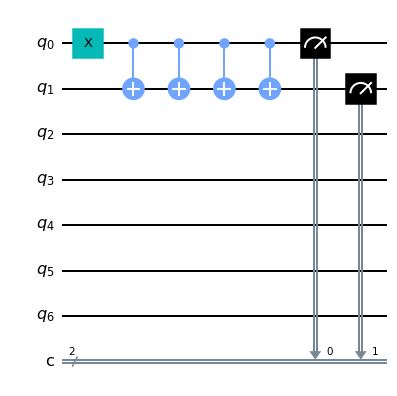

In [3]:
qc1 = QuantumCircuit(7,2)
qc1.x(0)
qc1.cx(0,1)
qc1.cx(0,1)
qc1.cx(0,1)
qc1.cx(0,1)
qc1.measure(list(range(2)), list(range(2)))
qc1.draw(output='mpl')

# "Positive test 1"
# (0,1): 0.00846 ;  (0,1): {(5,6):0.00738}
# 2 hops

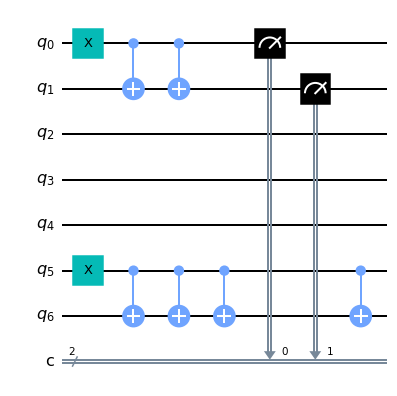

In [4]:
qc2 = QuantumCircuit(7,2)
qc2.x(0)
qc2.cx(0,1)
qc2.cx(0,1)
qc2.x(5)
qc2.cx(5,6)
qc2.cx(5,6)
qc2.cx(5,6)
qc2.cx(5,6)
qc2.measure(list(range(2)), list(range(2)))
qc2.draw(output='mpl')

In [5]:
job1 = execute(qc1,
              optimization_level=0,
              backend=backend,
              initial_layout=list(range(7)),
              shots=8192)
print(job1.job_id())

602e77cdded5ef89a28fa5ec


In [6]:
job2 = execute(qc2,
              optimization_level=0,
              backend=backend,
              initial_layout=list(range(7)),
              shots=8192)
print(job2.job_id())

602e77cfc77edf04ff816f89


In [7]:
count1 = job1.result().get_counts()
count2 = job2.result().get_counts()


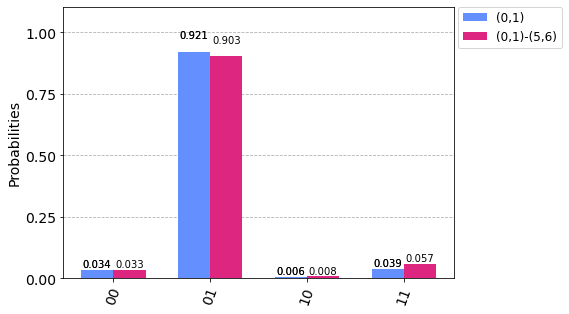

In [8]:
from qiskit.visualization import plot_histogram 
plot_histogram([count1, count2], legend=['(0,1)', '(0,1)-(5,6)'])


# "Positive test 2"
# (0,1): 0.00846 ;  (0,1) {(3,5):0.00742}
# 1 hops

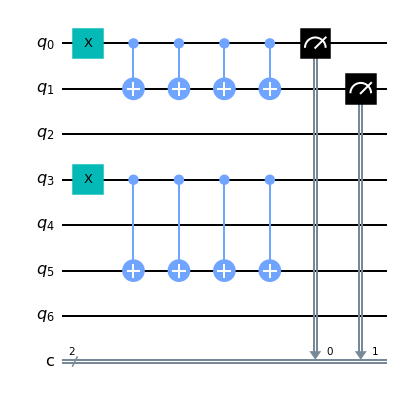

In [9]:
qc3 = QuantumCircuit(7,2)
qc3.x(0)
qc3.cx(0,1)
qc3.cx(0,1)
qc3.cx(0,1)
qc3.cx(0,1)
qc3.x(3)
qc3.cx(3,5)
qc3.cx(3,5)
qc3.cx(3,5)
qc3.cx(3,5)
qc3.measure(list(range(2)), list(range(2)))
qc3.draw(output='mpl')

In [10]:
job3 = execute(qc3,
              optimization_level=0,
              backend=backend,
              initial_layout=list(range(7)),
              shots=8192)
print(job3.job_id())

602e7822e59564307c95e7b9


In [11]:
count3 = job3.result().get_counts()

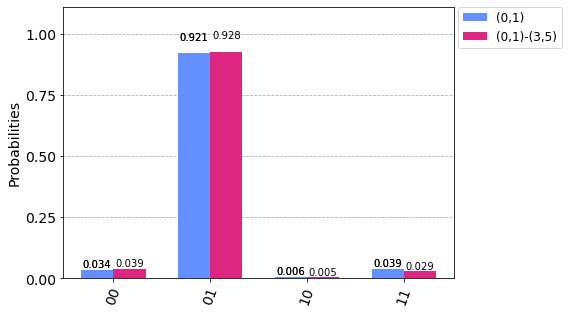

In [12]:
from qiskit.visualization import plot_histogram 
plot_histogram([count1, count3], legend=['(0,1)', '(0,1)-(3,5)'])


# "Negative test 1"
# (1,3): 0.00775 ;  (1,3): {(4,5):0.0264}
# 1 hops

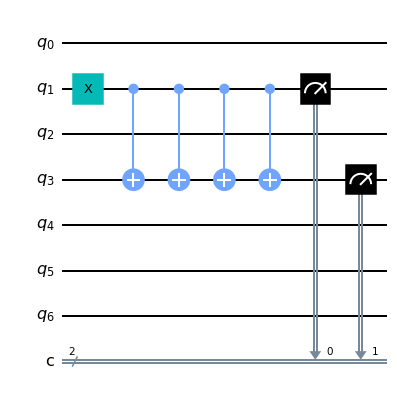

In [13]:
qc4 = QuantumCircuit(7,2)
qc4.x(1)
qc4.cx(1,3)
qc4.cx(1,3)
qc4.cx(1,3)
qc4.cx(1,3)

qc4.measure([1,3], list(range(2)))
qc4.draw(output='mpl')

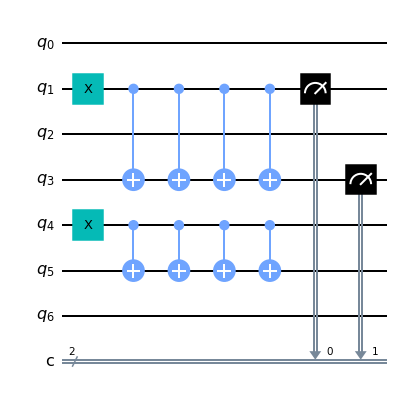

In [14]:
qc5 = QuantumCircuit(7,2)
qc5.x(1)
qc5.cx(1,3)
qc5.cx(1,3)
qc5.cx(1,3)
qc5.cx(1,3)
qc5.x(4)
qc5.cx(4,5)
qc5.cx(4,5)
qc5.cx(4,5)
qc5.cx(4,5)
qc5.measure([1,3], list(range(2)))
qc5.draw(output='mpl')

In [15]:
job4 = execute(qc4,
              optimization_level=0,
              backend=backend,
              initial_layout=list(range(7)),
              shots=8192)
print(job4.job_id())

602e78609a81c02bbd30432d


In [16]:
job5 = execute(qc5,
              optimization_level=0,
              backend=backend,
              initial_layout=list(range(7)),
              shots=8192)
print(job5.job_id())

602e7864785cb0a9573c388c


In [17]:
count4 = job4.result().get_counts()
count5 = job5.result().get_counts()

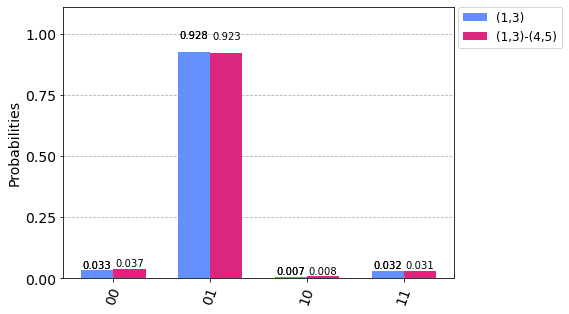

In [18]:
from qiskit.visualization import plot_histogram 
plot_histogram([count4, count5], legend=['(1,3)', '(1,3)-(4,5)'])


# With barriers

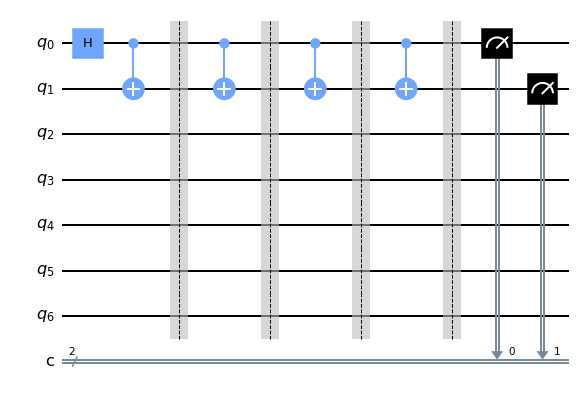

In [3]:
circuit1 = QuantumCircuit(7,2)
circuit1.h(0)
circuit1.cx(0,1)
circuit1.barrier()
circuit1.cx(0,1)
circuit1.barrier()
circuit1.cx(0,1)
circuit1.barrier()
circuit1.cx(0,1)
circuit1.barrier()
circuit1.measure(list(range(2)), list(range(2)))
circuit1.draw(output='mpl')

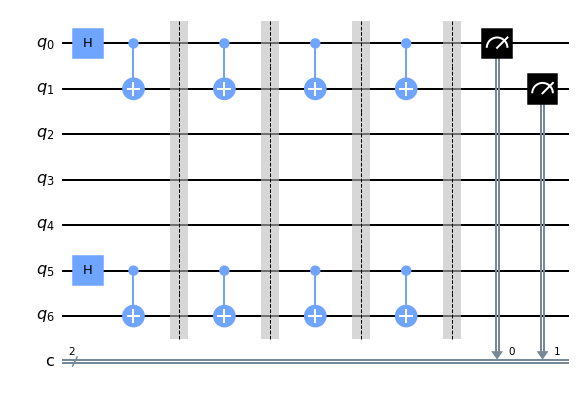

In [4]:
circuit2 = QuantumCircuit(7,2)
circuit2.h(0)
circuit2.h(5)
circuit2.cx(0,1)
circuit2.cx(5,6)
circuit2.barrier()
circuit2.cx(0,1)
circuit2.cx(5,6)
circuit2.barrier()
circuit2.cx(0,1)
circuit2.cx(5,6)
circuit2.barrier()
circuit2.cx(0,1)
circuit2.cx(5,6)
circuit2.barrier()
circuit2.measure(list(range(2)), list(range(2)))
circuit2.draw(output='mpl')

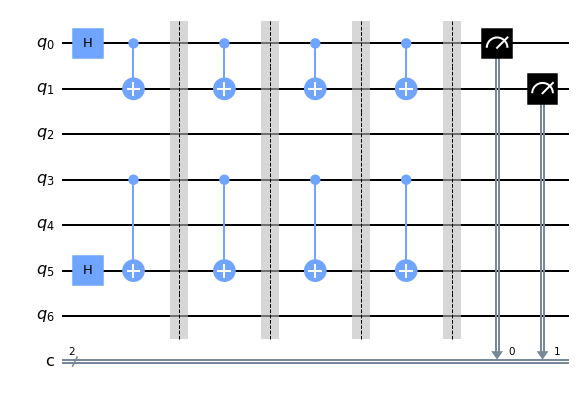

In [5]:
circuit3 = QuantumCircuit(7,2)
circuit3.h(0)
circuit3.h(5)
circuit3.cx(0,1)
circuit3.cx(3,5)
circuit3.barrier()
circuit3.cx(0,1)
circuit3.cx(3,5)
circuit3.barrier()
circuit3.cx(0,1)
circuit3.cx(3,5)
circuit3.barrier()
circuit3.cx(0,1)
circuit3.cx(3,5)
circuit3.barrier()
circuit3.measure(list(range(2)), list(range(2)))
circuit3.draw(output='mpl')

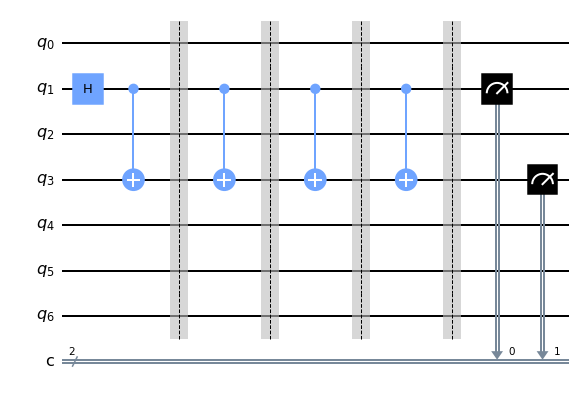

In [6]:
circuit4 = QuantumCircuit(7,2)
circuit4.h(1)
circuit4.cx(1,3)
circuit4.barrier()
circuit4.cx(1,3)
circuit4.barrier()
circuit4.cx(1,3)
circuit4.barrier()
circuit4.cx(1,3)
circuit4.barrier()
circuit4.measure([1,3], list(range(2)))
circuit4.draw(output='mpl')

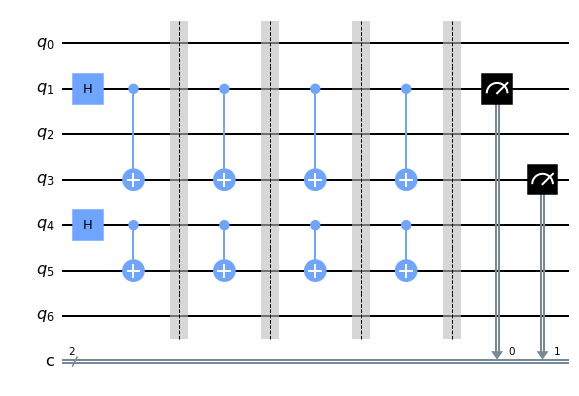

In [7]:
circuit5 = QuantumCircuit(7,2)
circuit5.h(1)
circuit5.h(4)
circuit5.cx(1,3)
circuit5.cx(4,5)
circuit5.barrier()
circuit5.cx(1,3)
circuit5.cx(4,5)
circuit5.barrier()
circuit5.cx(1,3)
circuit5.cx(4,5)
circuit5.barrier()
circuit5.cx(1,3)
circuit5.cx(4,5)
circuit5.barrier()
circuit5.measure([1,3], list(range(2)))
circuit5.draw(output='mpl')

In [6]:
new_job1 = execute(circuit1,
                  optimization_level=0,
                  backend=backend,
                  initial_layout=list(range(7)),
                  shots=8192)
print(new_job1.job_id())

602e7deb1fd8d77fc491ccbb


In [7]:
new_job2 = execute(circuit2,
                  optimization_level=0,
                  backend=backend,
                  initial_layout=list(range(7)),
                  shots=8192)
print(new_job2.job_id())

602e7dee9636a2fadef217c6


In [8]:
new_job3 = execute(circuit3,
                  optimization_level=0,
                  backend=backend,
                  initial_layout=list(range(7)),
                  shots=8192)
print(new_job3.job_id())

602e7df2e59564437e95e832


In [11]:
new_job4 = execute(circuit4,
                  optimization_level=0,
                  backend=backend,
                  initial_layout=list(range(7)),
                  shots=8192)
print(new_job4.job_id())

602e7b7b9a81c01784304374


In [12]:
new_job5 = execute(circuit5,
                  optimization_level=0,
                  backend=backend,
                  initial_layout=list(range(7)),
                  shots=8192)
print(new_job5.job_id())

602e7b7dded5efe9218fa64c


In [9]:
new_count1 = new_job1.result().get_counts()
new_count2 = new_job2.result().get_counts()
new_count3 = new_job3.result().get_counts()


In [ ]:
new_count4 = new_job4.result().get_counts()
new_count5 = new_job5.result().get_counts()

# Positive test 1

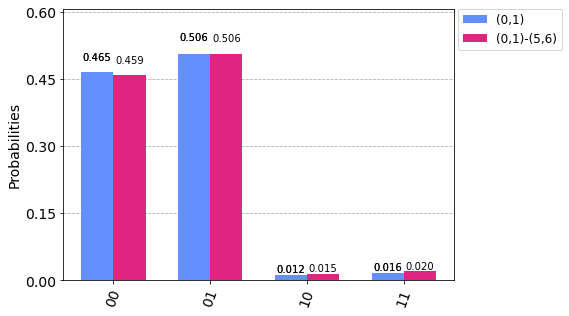

In [10]:
from qiskit.visualization import plot_histogram 
plot_histogram([new_count1, new_count2], legend=['(0,1)', '(0,1)-(5,6)'])


# Positive test 2

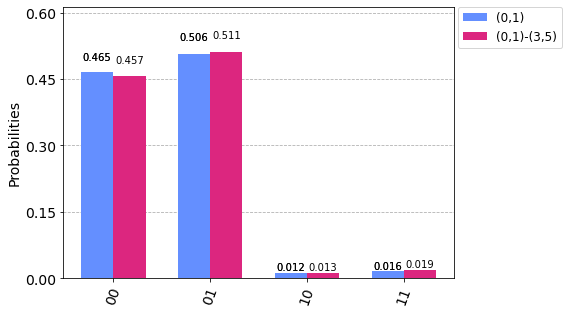

In [11]:
from qiskit.visualization import plot_histogram 
plot_histogram([new_count1, new_count3], legend=['(0,1)', '(0,1)-(3,5)'])


# Negative test 1

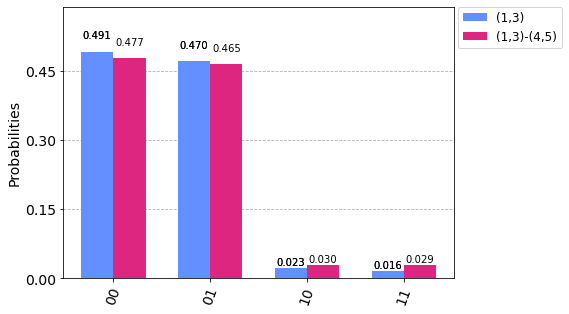

In [16]:
from qiskit.visualization import plot_histogram 
plot_histogram([new_count4, new_count5], legend=['(1,3)', '(1,3)-(4,5)'])
